# 📚 PROYECTO AI-TEXTIFICATION
## 👅 Procesamiento de Lenguaje Natural
## 💻 Instituto de Investigaciones en Matemáticas Aplicadas y en Sistemas
## 🏫 Universidad Nacional Autónoma de México

<hr>

### 🤖 AI-TEXTIFICATION
### 📓 CUADERNO [03]: MODELOS
### 📄 Detección de autoría en textos AI - Humanos:

#### 🔵 **Tarea A**: Clasificación Binaria:
1. Texto de Humano.
2. Texto de Inteligencia Artificial.

#### 🔵 **Tarea B**: Clasificación Multiclase:
1. Texto de ChatGPT.
2. Texto de Cohere.
3. Texto de Davinci.
4. Texto de Dolly.
5. Texto de Humano.

**👬 Autores:**
* León Rosas Manuel Alejandro.
* Ramos Herrera Iván Alejandro.


# [01] 🎯 Objetivo

**EN ESTE DESARROLLO DE CÓDIGO SE UTILIZARÁN LOS EMBEDDINGS Y DISTINTOS DATASETS GENERADOS EN NOTEBOOKS ANTERIORES Y SE IMPLEMENTARÁN MODELOS DE CLASIFICACIÓN PARA RESOLVER (O NO) DEFINITIVAMENTE LAA TAREAS A Y B.**

**Modelos propuestos:**

1. Transformer(Sólo Encoder) con Auto-Atención.
2. Red Neuronal Artificial Recurrente.

**Para los datasets:**

A. Original => Cleaned => Lemma => UNK => Gensim Embeddings.

B. Original => Cleaned => Lemma => UNK => Own Embeddings.

C. Original => Cleaned => UNK => Gensim Embeddings.

D. Original => Cleaned => UNK => Own Embeddings.

# [02] 📦 Data & Embeddings

In [ ]:
# Datasets:
TaskA_datasets = {
  "A": {
      "train_dataset": "/content/drive/MyDrive/Datasets/AITextification/TaskA-TrainAB.csv",
      "test_dataset": "/content/drive/MyDrive/Datasets/AITextification/TaskA-DevAB.csv",
      "embeddings": {
          "own": False,
          "path": "/content/drive/MyDrive/Datasets/AITextification/A_gensim_model.bin"
      }
  },
  "B": {
      "train_dataset": "/content/drive/MyDrive/Datasets/AITextification/TaskA-TrainAB.csv",
      "test_dataset": "/content/drive/MyDrive/Datasets/AITextification/TaskA-DevAB.csv",
      "embeddings": {
          "own": True,
          "model": "/content/drive/MyDrive/Datasets/AITextification/B_embeds_model.pkl",
          "word2Index": "/content/drive/MyDrive/Datasets/AITextification/B_word2Index.pkl",
          "dataset": "/content/drive/MyDrive/Datasets/AITextification/B_embeds.csv"
      }
  },
  "C": {
      "train_dataset": "/content/drive/MyDrive/Datasets/AITextification/TaskA-TrainCD.csv",
      "test_dataset": "/content/drive/MyDrive/Datasets/AITextification/TaskA-DevCD.csv",
      "embeddings": {
          "own": False,
          "path": "/content/drive/MyDrive/Datasets/AITextification/C_gensim_model.bin"
      }
  },
  "D": {
      "train_dataset": "/content/drive/MyDrive/Datasets/AITextification/TaskA-TrainCD.csv",
      "test_dataset": "/content/drive/MyDrive/Datasets/AITextification/TaskA-DevCD.csv",
      "embeddings": {
          "own": True,
          "model": "/content/drive/MyDrive/Datasets/AITextification/D_embeds_model.pkl",
          "word2Index": "/content/drive/MyDrive/Datasets/AITextification/D_word2Index.pkl",
          "dataset": "/content/drive/MyDrive/Datasets/AITextification/D_embeds.csv"
      }
  }
}

In [ ]:
TaskADatasetTEST = {
    "A": {
      "train_dataset": "/content/drive/MyDrive/Datasets/AITextification/TaskA-TrainAB.csv",
      "test_dataset": "/content/drive/MyDrive/Datasets/AITextification/TaskA-DevAB.csv",
      "embeddings": {
          "own": False,
          "path": "/content/drive/MyDrive/Datasets/AITextification/A_gensim_model.bin"
      }
  },
  "B": {
      "train_dataset": "/content/drive/MyDrive/Datasets/AITextification/TaskA-TrainAB.csv",
      "test_dataset": "/content/drive/MyDrive/Datasets/AITextification/TaskA-DevAB.csv",
      "embeddings": {
          "own": True,
          "model": "/content/drive/MyDrive/Datasets/AITextification/B_embeds_model.pkl",
          "word2Index": "/content/drive/MyDrive/Datasets/AITextification/B_word2Index.pkl",
          "dataset": "/content/drive/MyDrive/Datasets/AITextification/B_embeds.csv"
      }
  }
}

In [ ]:
# PARA TOMAR UN DATASET Y CONVERTIRLO EN DATOS LEÍBLES POR UN MODELO:
def get_gensim(dataset, embeddings):
  # Obtiene el dataset:
  dataset = pd.read_csv(dataset)

  # Etiquetas "y":
  y = dataset["label"].values

  # Obtiene las palabras únicas en el dataset:
  unique_words = set(" ".join(dataset["text"]).split())

  # Crea un diccionario de embeddings para las palabras únicas:
  word_embeddings = {word: embeddings.wv[word] if word in embeddings.wv else np.zeros(embeddings.vector_size)
                      for word in unique_words}

  # Crear la matriz de características "X":
  X = np.array([[word_embeddings[word] for word in sentence.split() if word in word_embeddings]
                for sentence in dataset["text"]])

  return X, y, len(unique_words)

In [ ]:
def load_embeddings(embeds_model_path, word2Index_path, embeds_csv_path):
  # Cargar embeddings model desde archivo pickle:
  with open(embeds_model_path, "rb") as model_file:
    embeds_model = pickle.load(model_file)

  # Cargar word2Index desde archivo pickle:
  with open(word2Index_path, "rb") as word2Index_file:
    word2Index = pickle.load(word2Index_file)

  # Cargar embeddings desde archivo CSV:
  embeds_df = pd.read_csv(embeds_csv_path)
  embeds = embeds_df.values

  return embeds, word2Index, embeds_model


def get_own(dataset, embeddings):
  # Obtiene el dataset:
  dataset = pd.read_csv(dataset)

  # Obtiene las etiquetas "y":
  y = dataset["label"].values

  # Obtiene las palabras únicas en el dataset:
  unique_words = set(" ".join(dataset["text"]).split())

  # Crea un diccionario de embeddings para las palabras únicas:
  word_embeddings = {word: embeddings.get_embedding_of(word, embeddings.word2Index) if word in embeddings.word2Index else np.zeros(embeddings.embedding_size)
                      for word in unique_words}

  # Crear la matriz de características "X":
  X = np.array([[word_embeddings[word] for word in sentence.split() if word in word_embeddings]
                for sentence in dataset["text"]])

  return X, y, len(unique_words)

In [ ]:
from sklearn.utils import shuffle

# Define la función para cargar embeddings y obtener datos de entrenamiento:
def get_data_and_embeddings(dataset_info, size=1):
  if dataset_info["embeddings"]["own"]:
      embeds_model, word2Index, embeds_csv = load_embeddings(
          dataset_info["embeddings"]["model"],
          dataset_info["embeddings"]["word2Index"],
          dataset_info["embeddings"]["dataset"]
      )
      embeddings, word2Index, embeds_model = load_embeddings(embeds_model, word2Index, embeds_csv)
      X, y, unique_words = get_own(dataset_info["train_dataset"], embeds_model)
  else:
    embeddings = Word2Vec.load(str(dataset_info["embeddings"]["path"]))
    X, y, unique_words = get_gensim(dataset_info["train_dataset"], embeddings)


  # Combina X e y antes de la mezcla aleatoria:
  combined = list(zip(X, y))

  # Mezcla aleatoria:
  combined = shuffle(combined, random_state=11)

  # Desempaqueta X e y después de la mezcla aleatoria:
  X, y = zip(*combined)

  # Devuelve X, y y unique_words por separado:
  return X[:int(len(X)*size)], y[:int(len(y)*size)], unique_words

In [ ]:
import pandas as pd
from sklearn.utils import shuffle

# Define la función para cargar embeddings y obtener datos de entrenamiento:
def get_data_and_words(dataset_path, size=1):

  # Obtiene un dataset con "text" y "labels":
  dataset = pd.read_csv(dataset_path)

  # Mezcla y obtiene una parte:
  dataset = dataset.sample(frac=size, random_state=11)

  # Separa X, y:
  X = dataset[["text"]].values.tolist()
  y = dataset[["label"]].values.tolist()

  # Obtén todas las palabras únicas:
  uniques_set = set()
  for texto in dataset["text"]:
    palabras = texto.split()
    uniques_set.update(palabras)
  unique_words = len(uniques_set)

  # Devuelve X, y y unique_words por separado:
  return X, y, unique_words

# [A] 🤓 Clasificiación [0: Humano | 1: Máquina]

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import pickle
from tqdm import tqdm
from gensim.models import Word2Vec

# [01] 🏡 KNeighborsClassifier

## Variaciones de función de obtención

In [ ]:
# Define la función para cargar embeddings y obtener datos de entrenamiento:
def get_train_data_and_embeddings(dataset_info, size=1):
    if dataset_info["embeddings"]["own"]:
        embeds_model, word2Index, embeds_csv = load_embeddings(
            dataset_info["embeddings"]["model"],
            dataset_info["embeddings"]["word2Index"],
            dataset_info["embeddings"]["dataset"]
        )
        embeddings, word2Index, embeds_model = load_embeddings(embeds_model, word2Index, embeds_csv)
        X, y, unique_words = get_own(dataset_info["train_dataset"], embeds_model)
    else:
        embeddings = Word2Vec.load(str(dataset_info["embeddings"]["path"]))
        X, y, unique_words = get_gensim(dataset_info["train_dataset"], embeddings)

    return X[:int(len(X)*size)], y[:int(len(y)*size)], unique_words

In [ ]:
# Define la función para cargar embeddings y obtener datos de entrenamiento:
def get_test_data_and_embeddings(dataset_info, size=1):
    if dataset_info["embeddings"]["own"]:
        embeds_model, word2Index, embeds_csv = load_embeddings(
            dataset_info["embeddings"]["model"],
            dataset_info["embeddings"]["word2Index"],
            dataset_info["embeddings"]["dataset"]
        )
        embeddings, word2Index, embeds_model = load_embeddings(embeds_model, word2Index, embeds_csv)
        X, y, unique_words = get_own(dataset_info["test_dataset"], embeds_model)
    else:
        embeddings = Word2Vec.load(str(dataset_info["embeddings"]["path"]))
        X, y, unique_words = get_gensim(dataset_info["test_dataset"], embeddings)

    return X[:int(len(X)*size)], y[:int(len(y)*size)], unique_words

## Average pooling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

### Baseline - KNN

In [ ]:
dataset_info = TaskA_datasets["A"]

In [ ]:
X, y, a = get_train_data_and_embeddings(dataset_info)
avg_pool = [np.mean(sentence, axis=0) for sentence in X]

X_train, X_test, y_train, y_test = train_test_split(avg_pool, y)

In [ ]:
knn = KNeighborsClassifier(metric='cosine')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83     15764
           1       0.86      0.70      0.77     14176

    accuracy                           0.81     29940
   macro avg       0.82      0.80      0.80     29940
weighted avg       0.81      0.81      0.80     29940



### Test data

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
X_train, y_train = avg_pool, y

In [ ]:
X_test, y_test, _ = get_test_data_and_embeddings(dataset_info)
X_test = [np.mean(sentence, axis=0) for sentence in X_test]

In [ ]:
knn = KNeighborsClassifier(metric='cosine')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.82      0.65      2500
           1       0.63      0.30      0.41      2500

    accuracy                           0.56      5000
   macro avg       0.58      0.56      0.53      5000
weighted avg       0.58      0.56      0.53      5000



In [ ]:
test_path = dir_path + 'TaskA-DevAB.csv'
train_path = dir_path + 'TaskA-TrainAB.csv'

In [ ]:
test_data = pd.read_csv(test_path)
train_data = pd.read_csv(train_path)

Results are not stellar, but they DO NOT generalize to the test dataset. The classifier seems to be picking up on patterns that exist in the training data (as a whole) but do not exist in the test data, which gives enough of a reason to think that test data is somehow different from the training data.

# Experiment

In [ ]:
plotdf_train = pd.DataFrame((train_data.text.map(len), y)).T
plotdf_train.columns = ['text', 'label']

In [ ]:
plotdf_test = pd.DataFrame((test_data.text.map(len), y_test)).T
plotdf_test.columns = ['text', 'label']

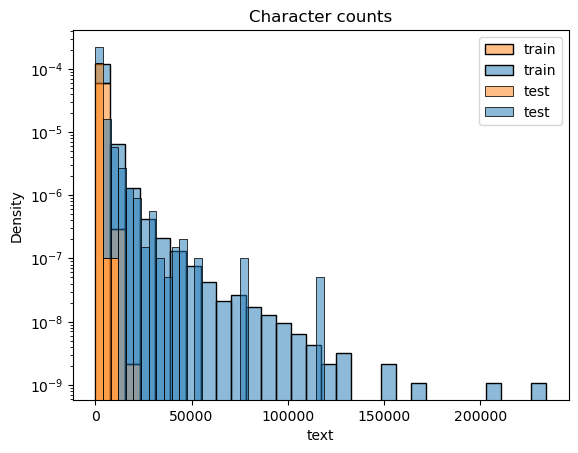

In [ ]:
sns.histplot(data=plotdf_train, x='text', stat='density', bins=30, label='train',
             multiple='stack', hue='label', alpha=0.5)
sns.histplot(data=plotdf_test, x='text', stat='density', bins=30, label='test',
             multiple='stack', hue='label', alpha=0.5)
plt.title('Character counts')
plt.legend()
plt.yscale('log')

this is kind of cheating, but this should help for these specific datasets

## Second attempt - add 1-grams

In [ ]:
X, y, _ = get_train_data_and_embeddings(dataset_info)
counts = np.array([len(sentence) for sentence in X])
avg_pool = np.array([np.mean(sentence, axis=0) for sentence in X])

In [ ]:
counts = counts.reshape(-1, 1)
counts = StandardScaler().fit_transform(counts)

In [ ]:
X = np.hstack([counts, avg_pool])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

NameError: ignored

In [ ]:
knn = KNeighborsClassifier(metric='cosine')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84     15739
           1       0.85      0.77      0.81     14201

    accuracy                           0.83     29940
   macro avg       0.83      0.82      0.82     29940
weighted avg       0.83      0.83      0.83     29940



### Test data

In [ ]:
X_train, y_train = X, y

In [ ]:
X_test, y_test, _ = get_test_data_and_embeddings(dataset_info)
counts = np.array([len(sentence) for sentence in X_test]).reshape(-1, 1)

counts = StandardScaler().fit_transform(counts)

avg_pool = np.array([np.mean(sentence, axis=0) for sentence in X_test])
X_test = np.hstack([counts, avg_pool])

In [ ]:
knn = KNeighborsClassifier(metric='cosine')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.83      0.66      2500
           1       0.65      0.32      0.43      2500

    accuracy                           0.58      5000
   macro avg       0.60      0.58      0.55      5000
weighted avg       0.60      0.58      0.55      5000



Better performance overall, but results are not getting closer.

Ideas: Try different preprocessing approach, try adding Max Pooling, add features. There's not much point trying to optimize a classifier for the data as it is.

In [ ]:
dataset_info = TaskA_datasets["B"]

X, y, _ = get_train_data_and_embeddings(dataset_info)
counts = np.array([len(sentence) for sentence in X])
avg_pool = np.array([np.mean(sentence, axis=0) for sentence in X])

X = np.hstack([counts, avg_pool])

X_train, X_test, y_train, y_test = train_test_split(X, y)

knn = KNeighborsClassifier(metric='cosine')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78     15739
           1       0.75      0.77      0.76     14201

    accuracy                           0.77     29940
   macro avg       0.77      0.77      0.77     29940
weighted avg       0.77      0.77      0.77     29940



In [ ]:
dataset_info = TaskA_datasets["C"]

X, y, _ = get_train_data_and_embeddings(dataset_info)
counts = np.array([len(sentence) for sentence in X])
avg_pool = np.array([np.mean(sentence, axis=0) for sentence in X])

X = np.hstack([counts, avg_pool])

X_train, X_test, y_train, y_test = train_test_split(X, y)

knn = KNeighborsClassifier(metric='cosine')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78     15739
           1       0.73      0.90      0.81     14201

    accuracy                           0.80     29940
   macro avg       0.81      0.80      0.79     29940
weighted avg       0.81      0.80      0.79     29940



In [ ]:
dataset_info = TaskA_datasets["D"]

X, y, _ = get_train_data_and_embeddings(dataset_info)
counts = np.array([len(sentence) for sentence in X])
avg_pool = np.array([np.mean(sentence, axis=0) for sentence in X])

X = np.hstack([counts, avg_pool])

X_train, X_test, y_train, y_test = train_test_split(X, y)

knn = KNeighborsClassifier(metric='cosine')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.67      0.73     15739
           1       0.69      0.80      0.74     14201

    accuracy                           0.73     29940
   macro avg       0.74      0.74      0.73     29940
weighted avg       0.74      0.73      0.73     29940



# [02] ⏩ RED NEURONAL RECURRENTE

## Modelo de la RED

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def train_rnn(X_train, y_train, X_test, y_test, epochs, batch_size):

  # Pad sequences to a fixed length (adjust maxlen as needed):
  max_sequence_length_train = max(len(seq) for seq in X_train)
  max_sequence_length_test = max(len(seq) for seq in X_test)

  # Use the maximum of the two for padding:
  maxlen = max(max_sequence_length_train, max_sequence_length_test)

  X_train_padded = pad_sequences(X_train, dtype="float32", padding="post", truncating="post", maxlen=maxlen)
  X_test_padded = pad_sequences(X_test, dtype="float32", padding="post", truncating="post", maxlen=maxlen)

  y_train = np.expand_dims(y_train, axis=-1)

  # Convert NumPy arrays to TensorFlow tensors:
  X_train_tensor = tf.convert_to_tensor(X_train_padded, dtype=tf.float32)
  y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)

  train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tensor, y_train_tensor)).batch(batch_size)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.LSTM(100, input_shape=(maxlen, X_train_padded.shape[2])))
  model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

  model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

  # Split the training data into training and validation sets:
  X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
      X_train_padded, y_train, test_size=0.3, random_state=11
  )

  history = model.fit(train_dataset, epochs=epochs, validation_data=(X_test_split, y_test_split), verbose=1)

  return model, history, maxlen


def evaluate_rnn(model, X_test, y_test, maxlen):
  # Convert X_test to a NumPy array if it's a list
  if isinstance(X_test, list):
    X_test = np.array([np.array(x) for x in X_test])

  # Pad sequences to a fixed length used during training (adjust maxlen as needed):
  X_test_padded = pad_sequences(X_test, dtype="float32", padding="post", truncating="post", maxlen=maxlen)

  # Convert X_test to a TensorFlow tensor:
  X_test_tensor = tf.convert_to_tensor(X_test_padded, dtype=tf.float32)

  # Predict on the test data:
  y_pred = model.predict(X_test_tensor)

  # Convert predicted probabilities to binary values:
  y_pred_binary = (y_pred > 0.5).astype(int)

  # Evaluate performance metrics:
  accuracy = accuracy_score(y_test, y_pred_binary)
  micro_f1 = f1_score(y_test, y_pred_binary, average="micro")
  macro_f1 = f1_score(y_test, y_pred_binary, average="macro")

  return accuracy, micro_f1, macro_f1

In [ ]:
# PARA TODOS LOS DATASETS:
xepochs = 10
xbatch = 64
xsize = 0.01
print("\n══════════════════════════════════════════")
print("\nCLASIFICADOR DE RED NEURONAL RECURRENTE")
print("\n══════════════════════════════════════════")
for dataset_name, dataset_info in TaskA_datasets.items():
  print(f"\nDATASET {dataset_name}:")

  # Obtiene datos y embeddings:
  X, y, unique_words = get_data_and_embeddings(dataset_info, size=xsize)

  # X = np.array(X)
  # y = np.array(y)

  # Inicializa k-fold cross-validation:
  k_folds = 5
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=11)

  avg_accuracy = 0
  avg_macro_f1 = 0
  avg_micro_f1 = 0

  skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=11)
  for train_index, test_index in skf.split(X, y):

    # train_index = np.array(train_index, dtype=int)
    # test_index = np.array(test_index, dtype=int)

    X_train, X_test = np.array(X)[train_index], np.array(X)[test_index]
    y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]

    # Entrena el modelo en los datos de entrenamiento:
    model, history, maxlen = train_rnn(X_train, y_train, X_test, y_test, epochs=xepochs, batch_size=xbatch)

    # Evalua el modelo en los datos de prueba:
    accuracy, micro_f1, macro_f1 = evaluate_rnn(model, X_test, y_test, maxlen)
    print("\nPara el FOLD:")
    print(f" * Accuracy: {accuracy*100:.2f}%\n * F1-Score Micro: {micro_f1*100:.2f}%\n * F1-Score Macro: {macro_f1*100:.2f}%\n")

    avg_accuracy += accuracy
    avg_macro_f1 += macro_f1
    avg_micro_f1 += micro_f1

  avg_accuracy /= k_folds
  avg_macro_f1 /= k_folds
  avg_micro_f1 /= k_folds


  # Imprime resultados:
  print(f" * Promedio Accuracy: {avg_accuracy*100:.2f}%")
  print(f" * Promedio Macro F1: {avg_macro_f1*100:.2f}%")
  print(f" * Promedio Micro F1: {avg_micro_f1*100:.2f}%")

print("\n══════════════════════════════════════════")


══════════════════════════════════════════

CLASIFICADOR DE RED NEURONAL RECURRENTE

══════════════════════════════════════════

DATASET A:


<ipython-input-3-f0c5682550fd>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[word_embeddings[word] for word in sentence.split() if word in word_embeddings]
<ipython-input-12-47eeda10dc50>:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train, X_test = np.array(X)[train_index], np.array(X)[test_index]


# [04] 👬 Autores
## Realizado por:
* León Rosas Manuel Alejandro.
* Ramos Herrera Iván Alejandro.

## [0X] 🔎 FAILURE SELF-ATTENTION

### Código del Modelo

### Previo

In [ ]:
import torch
import torch.nn as nn
import copy
import math

In [ ]:
# Positional Encoder:
class PositionalEncoding(nn.Module):
  def __init__(self, dimension, max_len=1000):
    super(PositionalEncoding, self).__init__()

    # Matriz de dimensión de embeddings por número máximo de elementos:
    pe = torch.zeros(max_len, dimension)
    # Posición de 0 al máximo número de elementos (enteros):
    position = torch.arange(0, max_len).unsqueeze(1)
    # Factores de log y exp:
    div_term = torch.exp(torch.arange(0, dimension, 2) * -(math.log(10000.0) / dimension))

    # Entradas Pares:
    pe[:, 0::2] = torch.sin(position * div_term)
    # Entradas Impares:
    pe[:, 1::2] = torch.cos(position * div_term)
    self.register_buffer("pe", pe)


  def forward(self, x):
    # Suma del x más su codificación posicional:
    # x = x + torch.autograd.Variable(self.pe[:x.size(0), :x.size(1)], requires_grad=False).reshape(x.shape)
    x = x + self.pe[:x.size(1), :].unsqueeze(0)

    return x

In [ ]:
# Capa de Normalización:
class NormalizationLayer(nn.Module):
  def __init__(self, features, eps=1e-6):
    super(NormalizationLayer, self).__init__()
    self.a_2 = nn.Parameter(torch.ones(features))
    self.b_2 = nn.Parameter(torch.zeros(features))
    self.eps = eps

  def forward(self, x):
    mean = x.mean(-1, keepdim=True)
    std = x.std(-1, keepdim=True)

    # Distribución N(0,1):
    return self.a_2 * (x - mean) / (std + self.eps) + self.b_2

In [ ]:
# Capa Auto-Atencional:
class AttentionLayer(nn.Module):
  def __init__(self, dimension):
    super(AttentionLayer, self).__init__()

    # Pesos Query:
    self.Q = nn.Linear(dimension, dimension, bias=False)
    # Pesos Key:
    self.K  = nn.Linear(dimension, dimension, bias=False)
    # Pesos Value:
    self.V  = nn.Linear(dimension, dimension, bias=False)
    self.dimension = dimension


  def forward(self, x):
    # Capas atencionales:
    query, key, value = self.Q(x), self.K(x), self.V(x)
    print(f"Query shape: {query.shape}")
    print(f"Key shape: {key.shape}")
    print(f"Value shape: {value.shape}")

    # Computa el método de self-attention para las x's totalmente conectadas:
    # scores = torch.matmul(query, key.T)/math.sqrt(self.dimension)
    scores = torch.matmul(query, key.permute(0, 2, 1)) / math.sqrt(self.dimension)
    print(f"Scores shape: {scores.shape}")

    # Salida con Softmax:
    p_attn = torch.nn.functional.softmax(scores, dim = -1)
    Vs = torch.matmul(p_attn, value).reshape(x.shape)
    print(f"Output shape after attention: {Vs.shape}")

    return Vs, p_attn

In [ ]:
# MODELO ATENCIONAL:
class AttentionalClassificator(nn.Module):
  def __init__(self, vocabulary_size, embed_dimension=50, classes=2):
    super(AttentionalClassificator, self).__init__()

    # Capa de embeddings:
    self.embeddings = nn.Embedding(vocabulary_size, embed_dimension)
    # Capa de Positional Encoding:
    self.positional = PositionalEncoding(embed_dimension)
    # Capa Atencional:
    self.attention = AttentionLayer(embed_dimension)
    # Capa de Normalización:
    self.normalization = NormalizationLayer(embed_dimension)
    # Capa de Clasificación FeedForward:
    if classes == 2:
      self.feedforward = nn.Sequential(nn.Linear(embed_dimension, embed_dimension), nn.Tanh(), nn.Linear(embed_dimension, classes), nn.Sigmoid())
    else:
      self.feedforward = nn.Sequential(nn.Linear(embed_dimension, embed_dimension), nn.Tanh(), nn.Linear(embed_dimension, classes), nn.Softmax(classes))
    # Matriz de Pesos Atencionales:
    self.attention_matrix = None
    self.dropout = nn.Dropout(0.5)


  def forward(self, x):
    print(f"\nInput shape (before embeddings): {x.shape}")
    # x = x.squeeze(0)
    x = x.long()
    x_emb = self.positional(self.embeddings(x.squeeze(0)))
    print(f"Embeddings shape: {x_emb.shape}")
    x_emb = self.normalization(x_emb)
    h, self.attention_matrix = self.attention(x_emb)
    print(f"Output shape after attention: {h.shape}")
    h = self.normalization(x_emb + h)
    h = self.dropout(h)
    output = self.feedforward(h)
    print(f"Final output shape: {output.shape}")
    return output

    return output

### NUEVA IMPLEMENTACIÓN

```python
import torch
import torch.nn as nn
import torch.optim as optim

class SelfAttentionClassifier(nn.Module):
  def __init__(self, embedding_dim, hidden_dim, num_heads, output_dim, dropout=0.1):
    super(SelfAttentionClassifier, self).__init__()

    # Input Embedding:
    self.embedding = nn.Embedding(unique_words, embedding_dim)

    # Positional Embedding:
    self.positional_encoding = PositionalEncoding(embedding_dim)

    # Multi-Head Attention:
    self.multihead_attention = nn.MultiheadAttention(embed_dim=embedding_dim, num_heads=num_heads, dropout=dropout)

    # FeedForward:
    self.feedforward = nn.Sequential(
      nn.Linear(embedding_dim, hidden_dim),
      nn.ReLU(),
      nn.Dropout(dropout),
      nn.Linear(hidden_dim, output_dim)
    )

  def forward(self, x):
    x = x.transpose(0, 1)
    x = self.embedding(x)
    x = self.positional_encoding(x)
    x, _ = self.multihead_attention(x, x, x)
    x = x + x
    x = nn.LayerNorm(x.size()[1:]).to("cpu")(x)
    x = self.feedforward(x)
    return x

# Clase para la codificación posicional:
class PositionalEncoding(nn.Module):
  def __init__(self, d_model, max_len=512):
    super(PositionalEncoding, self).__init__()
    self.encoding = torch.zeros(max_len, d_model)
    position = torch.arange(0, max_len).unsqueeze(1).float()
    div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model))
    self.encoding[:, 0::2] = torch.sin(position * div_term)
    self.encoding[:, 1::2] = torch.cos(position * div_term)
    self.encoding = self.encoding.unsqueeze(0)

  def forward(self, x):
    print(f"Positional Encoding Input Shape: {x.shape}")
    return x + self.encoding[:, :x.size(1)].detach().to("cpu")
```

In [ ]:
# Prueba rápida
unique_words = 10000

modelx = SelfAttentionClassifier(256, 128, 8, 1)
dummy_input = torch.randint(0, unique_words, (32, 64))
output = modelx(dummy_input)
print("dummy_input.shape:", dummy_input.shape)

In [ ]:
torch.randint(0, unique_words, (32, 64)).shape

### Implementación & Evaluación

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
import math

In [ ]:
# Obtiene el dataset de palabras:
X, y, unique_words = get_data_and_words("/content/drive/MyDrive/Datasets/AITextification/TaskA-TrainAB.csv", size=0.0001)
# Cargar word2Index desde archivo pickle:
import pickle
with open("/content/drive/MyDrive/Datasets/AITextification/B_word2Index.pkl", "rb") as word2Index_file:
  word2Index = pickle.load(word2Index_file)
# Obtiene índices de palabras a partir de word2Index:
X = [[word2Index[word] for word in texto[0].split()] for texto in X]

In [ ]:
from keras.preprocessing.sequence import pad_sequences

# Encuentra la longitud de la cadena más larga
max_length = max(len(seq) for seq in X)
print("Secuencia más grande:", max_length)

# Rellena las secuencias para que todas tengan la misma longitud
X = pad_sequences(X, maxlen=max_length, padding="post", truncating="post", value=-1)

# Imprime la nueva forma de X
print("Nueva forma de X:", X.shape)
print("Acá ya todas las secuencias tienen la misma longitud.")
print("Tamaño de de y:", len(y))
print("Tamaño del vocabulario:", unique_words)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, n_heads):
        super(MultiHeadAttention, self).__init__()
        self.n_heads = n_heads
        self.d_model = d_model

        self.query_linear = nn.Linear(d_model, d_model)
        self.key_linear = nn.Linear(d_model, d_model)
        self.value_linear = nn.Linear(d_model, d_model)
        self.out_linear = nn.Linear(d_model, d_model)

    def forward(self, query, key, value, mask=None):
        batch_size, seq_len, d_model = query.size()

        # Linear transformations
        query = self.query_linear(query).view(batch_size, seq_len, self.n_heads, -1)
        key = self.key_linear(key).view(batch_size, seq_len, self.n_heads, -1)
        value = self.value_linear(value).view(batch_size, seq_len, self.n_heads, -1)

        # Transpose for multi-head attention
        query = query.transpose(1, 2)
        key = key.transpose(1, 2)
        value = value.transpose(1, 2)

        # Scaled Dot-Product Attention
        scores = torch.matmul(query, key.transpose(-2, -1)) / torch.sqrt(d_model)
        if mask is not None:
            scores = scores.masked_fill(mask == 0, -1e9)

        attention_weights = F.softmax(scores, dim=-1)
        attended_values = torch.matmul(attention_weights, value)

        # Transpose and concatenate to get the original shape
        attended_values = attended_values.transpose(1, 2).contiguous().view(batch_size, seq_len, -1)

        # Linear transformation for the output
        output = self.out_linear(attended_values)

        return output

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=512):
        super(PositionalEncoding, self).__init__()
        self.encoding = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model))
        self.encoding[:, 0::2] = torch.sin(position * div_term)
        self.encoding[:, 1::2] = torch.cos(position * div_term)
        self.encoding = self.encoding.unsqueeze(0)

    def forward(self, x):
        return x + self.encoding[:, :x.size(1)].detach()

class TransformerClassifier(nn.Module):
    def __init__(self, vocab_size, d_model, n_heads, hidden_dim, num_classes, max_len=100):
        super(TransformerClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.positional_encoding = PositionalEncoding(d_model, max_len)
        self.multihead_attention = MultiHeadAttention(d_model, n_heads)
        self.feedforward = nn.Sequential(
            nn.Linear(d_model, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, num_classes)
        )

    def forward(self, x):
        x = self.embedding(x)
        x = self.positional_encoding(x)
        attention_output = self.multihead_attention(x, x, x)
        x = x + attention_output  # Add & Norm
        x = F.layer_norm(x, x.size()[1:])  # Normalization
        x = self.feedforward(x)
        return F.log_softmax(x, dim=-1)

In [ ]:
from sklearn.utils import shuffle

# Define la función para cargar embeddings y obtener datos de entrenamiento:
def get_data_and_embeddings(dataset_info, size=1):
  if dataset_info["embeddings"]["own"]:
      embeds_model, word2Index, embeds_csv = load_embeddings(
          dataset_info["embeddings"]["model"],
          dataset_info["embeddings"]["word2Index"],
          dataset_info["embeddings"]["dataset"]
      )
      embeddings, word2Index, embeds_model = load_embeddings(embeds_model, word2Index, embeds_csv)
      X, y, unique_words = get_own(dataset_info["train_dataset"], embeds_model)
  else:
    embeddings = Word2Vec.load(str(dataset_info["embeddings"]["path"]))
    X, y, unique_words = get_gensim(dataset_info["train_dataset"], embeddings)


  # Combina X e y antes de la mezcla aleatoria:
  combined = list(zip(X, y))

  # Mezcla aleatoria:
  combined = shuffle(combined, random_state=11)

  # Desempaqueta X e y después de la mezcla aleatoria:
  X, y = zip(*combined)

  # Devuelve X, y y unique_words por separado:
  return X[:int(len(X)*size)], y[:int(len(y)*size)], unique_words

## EJEMPLOS FALLIDOS

In [ ]:
from tqdm import tqdm

# Carga los datos y embeddings:
dataset_info = TaskA_datasets["A"]
X, y, _ = get_data_and_embeddings(dataset_info, size=0.0001)

# Divide los datos en conjuntos de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=11)

# Rellena las secuencias para que tengan la misma longitud:
X_train_padded, X_train_lengths = pad_sequences(X_train)
X_test_padded, X_test_lengths = pad_sequences(X_test)

# Convierte los datos a tensores de PyTorch:
X_train_tensor = torch.tensor(X_train_padded).float()
y_train_tensor = torch.tensor(y_train).long()

X_test_tensor = torch.tensor(X_test_padded).float()
y_test_tensor = torch.tensor(y_test).long()

# Crea conjuntos de datos y dataloaders:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Configura el modelo y el optimizador:
model = AttentionalClassificator(vocabulary_size=TaskA_datasets, embed_dimension=50, classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenamiento del modelo:
num_epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
  model.train()
  total_loss = 0

  for batch_x, batch_y in train_dataloader:
    batch_x, batch_y = batch_x.to(device), batch_y.to(device)

    optimizer.zero_grad()
    outputs = model(batch_x)
    loss = criterion(outputs, batch_y)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

# Evaluación del modelo:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch_x, batch_y in test_dataloader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)

        preds = model(batch_x)
        _, pred_labels = torch.max(preds, 1)

        all_preds.extend(pred_labels.cpu().numpy())
        all_labels.extend(batch_y.cpu().numpy())

# Calcula y muestra la accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Accuracy on test set: {accuracy}")

In [ ]:
# Función para obtener datos y embeddings:
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence, pad_sequence

def get_data_and_attentional_embeddings(dataset_info, max_sequence_length=None):
  if dataset_info["embeddings"]["own"]:
    embeds_model, word2Index, embeds_csv = load_embeddings(
        dataset_info["embeddings"]["model"],
        dataset_info["embeddings"]["word2Index"],
        dataset_info["embeddings"]["dataset"]
    )
    embeddings, word2Index, embeds_model = load_embeddings(embeds_model, word2Index, embeds_csv)
    X, y, unique_words = get_own(dataset_info["train_dataset"], embeds_model, max_sequence_length)
  else:
    embeddings = Word2Vec.load(str(dataset_info["embeddings"]["path"]))
    X, y, unique_words = get_gensim(dataset_info["train_dataset"], embeddings, max_sequence_length)

  # Aplica Padding a los datos para que tengan la misma longitud:
  X_padded = pad_sequences(X, max_sequence_length)

  # Convierte a tensores de PyTorch:
  X_tensor = torch.tensor(X_padded, dtype=torch.long)
  y_tensor = torch.tensor(y, dtype=torch.long)

  return X_tensor, y_tensor, unique_words

In [ ]:
def pad_sequences(sequences, padding_value=0):
  lengths = [len(seq) for seq in sequences]
  padded_sequences = pad_sequence([torch.tensor(seq) for seq in sequences], batch_first=True, padding_value=padding_value)
  return padded_sequences, lengths

In [ ]:
# Carga los datos y embeddings
dataset_info = TaskA_datasets["A"]
X, y, _ = get_data_and_embeddings(dataset_info)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# Rellena las secuencias para que tengan la misma longitud
X_train_padded, X_train_lengths = pad_sequences(X_train)
X_test_padded, X_test_lengths = pad_sequences(X_test)

# Convierte los datos a tensores de PyTorch
X_train_tensor = torch.tensor(X_train).float()
y_train_tensor = torch.tensor(y_train).long()

X_test_tensor = torch.tensor(X_test).float()
y_test_tensor = torch.tensor(y_test).long()

# Crea conjuntos de datos y dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Configura el modelo y el optimizador
model = AttentionalClassificator(vocabulary_size=TaskA_datasets["A"]["vocabulary_size"], embed_dimension=50, classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenamiento del modelo
num_epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
  model.train()
  total_loss = 0

  for batch_x, batch_y in train_dataloader:
      batch_x, batch_y = batch_x.to(device), batch_y.to(device)

      optimizer.zero_grad()
      outputs = model(batch_x)
      loss = criterion(outputs, batch_y)
      loss.backward()
      optimizer.step()

      total_loss += loss.item()

  print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")

# Evaluación del modelo
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
  for batch_x, batch_y in test_dataloader:
    batch_x, batch_y = batch_x.to(device), batch_y.to(device)

    preds = model(batch_x)
    _, pred_labels = torch.max(preds, 1)

    all_preds.extend(pred_labels.cpu().numpy())
    all_labels.extend(batch_y.cpu().numpy())

# Calcula y muestra la accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Accuracy on test set: {accuracy}")

In [ ]:
# Define la función para convertir una lista de listas en tensores con padding dinámico:
def dynamic_padding(batch):
  # Ordena el batch por la longitud descendente:
  sorted_batch = sorted(batch, key=lambda x: x[1], reverse=True)
  sequences, lengths = zip(*sorted_batch)
  padded_sequences = pad_sequence([torch.Tensor(seq) for seq in sequences], batch_first=True)
  return padded_sequences, lengths

In [ ]:
def pad_data(X):
    # Encuentra la longitud máxima de los ejemplos
    max_length = max(len(example) for example in X)

    # Inicializa un tensor con forma (num_examples, max_length, embed_dimension)
    padded_X = torch.zeros((len(X), max_length, X[0].shape[1]))

    # Rellena el tensor con los ejemplos
    for i, example in enumerate(X):
        length = len(example)
        padded_X[i, :length, :] = torch.tensor(example)

    return padded_X

In [ ]:
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Obtén los datos y embeddings
X, y, _ = get_data_and_embeddings(TaskA_datasets["A"])
max_length = max(len(example) for example in X)

# Inicializa una lista para almacenar tensores de PyTorch
padded_X = []

# Convierte cada array de NumPy a un tensor de PyTorch y realiza el "padding" por lotes
for example in X:
    padded_example = np.zeros((max_length, len(example[0])), dtype=np.float32)
    padded_example[:len(example)] = example
    padded_X.append(torch.tensor(padded_example))

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(padded_X, y, test_size=0.2, random_state=42)

# Convierte los datos a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define el DataLoader para cargar los datos en lotes
batch_size = 64
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

flat_X = np.concatenate([np.concatenate(example) for example in X])

# Obtener palabras únicas utilizando operaciones de conjuntos
unique_words_set = set(np.unique(flat_X))

# Obtener el tamaño del vocabulario
vocab_size = len(unique_words_set)

# Hiperparámetros
vocabulary_size = vocab_size
embed_dimension = 50
classes = 2
learning_rate = 0.001
epochs = 10

# Instanciar el modelo
model = AttentionalClassificator(vocabulary_size, embed_dimension, classes)

# Optimizador
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.BCELoss()

# Entrenamiento del modelo
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for X_batch, y_batch in zip(X_train_tensor, y_train_tensor):
        # Reiniciar los gradientes
        optimizer.zero_grad()

        # Pasar datos a través del modelo
        outputs = model(X_batch)

        # Calcular la pérdida
        loss = criterion(outputs, y_batch.float())

        # Retropropagación y optimización
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Imprimir la pérdida promedio en cada época
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(X_train_tensor)}')

# Validación del modelo en el conjunto de prueba
model.eval()
with torch.no_grad():
    correct = 0
    total = 0

    for X_batch, y_batch in zip(X_test_tensor, y_test_tensor):
        outputs = model(X_batch)
        predicted = torch.round(outputs)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

    accuracy = correct / total
    print(f'Accuracy on test set: {accuracy}')

In [ ]:
# PARA TODOS LOS DATASETS:
print("\n════════════════════════════════════════════")
print("\nSELF-ATTENTION ENCODER CLASSIFICATOR MODEL")
print("\n════════════════════════════════════════════")
for dataset_name, dataset_info in TaskA_datasets.items():
  print(f"\nDATASET {dataset_name}:")

  # Obtiene datos y embeddings:
  X, y, unique_words = get_data_and_embeddings(dataset_info)

  # Instancia el modelo:
  model = AttentionalClassificator(vocabulary_size=len(unique_words), embed_dimension=50, classes=2)

  # Entrena y evalúa el modelo con k-fold cross validation:
  avg_accuracy, avg_macro_f1, avg_micro_f1 = train_and_evaluate_model(model, X, y, epochs=1000, kfolds=5)

  # Imprime resultados:
  print(f" * Promedio Accuracy: {avg_accuracy}")
  print(f" * Promedio Macro F1: {avg_macro_f1}")
  print(f" * Promedio Micro F1: {avg_micro_f1}")

print("\n════════════════════════════════════════════")

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from torch.utils.data import DataLoader

# Función para entrenar y evaluar con K-Folds:
def train_and_evaluate_model(model, X, y, epochs=100, kfolds=5):
  skf = StratifiedKFold(n_splits=kfolds, shuffle=True, random_state=11)

  accuracies = []
  macro_f1_scores = []
  micro_f1_scores = []

  # One-Hot Encoding para etiquetas:
  label_encoder = LabelEncoder()
  onehot_encoder = OneHotEncoder(sparse=False)
  y_encoded = label_encoder.fit_transform(y)
  y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))

  for train_index, _ in skf.split(X, y):
    X_train, y_train = X[train_index], y_onehot[train_index]

    # Tamaño máximo de índices del entrenamiento actual:
    max_index = int(np.max(np.concatenate([np.max(seq) for seq in X_train], axis=None)))
    max_len = int(np.max([len(seq) for seq in X_train]))
    model.positional = PositionalEncoding(model.embeddings.embedding_dim, max_len=max_len)


    # Verifica y actualiza el tamaño del vocabulario en la capa de embeddings:
    if max_index >= model.embeddings.num_embeddings:
      new_vocab_size = max_index + 1
      new_embeddings = nn.Embedding(new_vocab_size, model.embeddings.embedding_dim)
      with torch.no_grad():
        new_embeddings.weight[:model.embeddings.num_embeddings, :] = model.embeddings.weight
      model.embeddings = new_embeddings

    # Convierte x, y a tensores:
    dataloader = DataLoader(list(zip(X_train, [len(seq) for seq in X_train])), batch_size=20, collate_fn=dynamic_padding, shuffle=True)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

    # Define la pérdida y el optimizador:
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Entrenamiento:
    for epoch in tqdm(range(epochs)):
      for batch, lengths in dataloader:
        X_batch = batch

        # Hace el padding dinámico:
        X_packed = pack_padded_sequence(X_batch, lengths, batch_first=True, enforce_sorted=False)
        optimizer.zero_grad()

        # Desempaqueta X_packed antes de pasar a la capa de embedding:
        X_unpacked, _ = pad_packed_sequence(X_packed, batch_first=True)
        X_unpacked = X_unpacked.long()

        # Resto del entrenamiento:
        output = model(X_unpacked)
        loss = criterion(output, y_train_tensor)
        loss.backward()
        optimizer.step()

      # Evaluación:
      model.eval()
      with torch.no_grad():
        padded_sequences, _ = pad_packed_sequence(X_packed, batch_first=True)
        y_pred = model(padded_sequences).argmax(dim=1).numpy()
      accuracies.append(accuracy_score(y_train, y_pred))
      macro_f1_scores.append(f1_score(y_train, y_pred, average="macro"))
      micro_f1_scores.append(f1_score(y_train, y_pred, average="micro"))

  # Calcula promedio de métricas:
  avg_accuracy = np.mean(accuracies)
  avg_macro_f1 = np.mean(macro_f1_scores)
  avg_micro_f1 = np.mean(micro_f1_scores)

  return avg_accuracy, avg_macro_f1, avg_micro_f1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Obtén los datos de entrenamiento y embeddings para el conjunto A
X_A, y_A, _ = get_data_and_embeddings(TaskA_datasets["A"])

# Divide los datos en conjuntos de entrenamiento y prueba
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_A, y_A, test_size=0.2, random_state=42)

# Entrenar el modelo utilizando lotes
model_A = SVC()

batch_size = 100
for i in range(0, len(X_train_A), batch_size):
    X_batch = [np.mean(np.concatenate(x_i), axis=0).reshape(1, -1) for x_i in X_train_A[i:i+batch_size]]
    y_batch = y_train_A[i:i+batch_size]
    model_A.fit(np.concatenate(X_batch), y_batch)

In [ ]:
# Realizar predicciones en el conjunto de prueba
X_test_flat_A = []

for x_i in X_test_A:
  # Promedia los vectores de palabras y da la forma adecuada
  averaged_vector = np.mean(np.concatenate(x_i), axis=0).reshape(1, -1)
  X_test_flat_A.append(averaged_vector)

# Concatenar la lista de vectores en un array bidimensional
X_test_flat_A = np.concatenate(X_test_flat_A)

# Realizar predicciones en el conjunto de prueba
predictions_A = model_A.predict(X_test_flat_A)

# Evaluar la precisión del modelo
accuracy_A = accuracy_score(y_test_A, predictions_A)
print(f"Accuracy for Task A: {accuracy_A}")


In [ ]:
print("X_test_A.shape:", X_test_A.shape)
print("y_test_A.shape:", y_test_A)
print("y_test_A[0]:", y_test_A[0])
print("y_test_A[80]:", y_test_A[80])

## MÁS EJEMPLOS FALLIDOS

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
# Define la función para convertir una lista de listas en tensores con padding dinámico:
def dynamic_padding(batch):
  # Ordena el batch por la longitud descendente:
  sorted_batch = sorted(batch, key=lambda x: x[1], reverse=True)
  sequences, lengths = zip(*sorted_batch)
  print(f"\nLengths of sequences: {lengths}")

  # Convierte las secuencias a tensores de tipo entero:
  sequences = [torch.LongTensor(np.array(seq).astype(np.int64)) for seq in sequences]

  # Utiliza pad_sequence directamente:
  padded_sequences = pad_sequence(sequences, batch_first=True)

  # Asegura que las longitudes reflejen las longitudes reales después del padding:
  lengths = [len(seq) for seq in sequences]

  return padded_sequences, lengths

In [ ]:
# Función para entrenar y evaluar con K-Folds:
def train_and_evaluate_model(model, X, y, epochs=100, kfolds=5):
  skf = StratifiedKFold(n_splits=kfolds, shuffle=True, random_state=11)

  accuracies = []
  macro_f1_scores = []
  micro_f1_scores = []

  # One-Hot Encoding para etiquetas:
  label_encoder = LabelEncoder()
  onehot_encoder = OneHotEncoder(sparse=False)
  y_encoded = label_encoder.fit_transform(y)
  y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))

  for train_index, _ in skf.split(X, y):
    X_train, y_train = X[train_index], y_onehot[train_index]

    # Convierte x, y a tensores:
    dataloader = DataLoader(list(zip(X_train, [len(seq) for seq in X_train])), batch_size=1, collate_fn=dynamic_padding, shuffle=True)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

    # Define la pérdida y el optimizador:
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Entrenamiento:
    for epoch in tqdm(range(epochs)):
      for batch, lengths in dataloader:
        X_batch = batch

        # Hace el padding dinámico:
        X_packed = pack_padded_sequence(X_batch, lengths, batch_first=True, enforce_sorted=False)
        optimizer.zero_grad()

        # Desempaqueta X_packed antes de pasar a la capa de embedding:
        X_unpacked, _ = pad_packed_sequence(X_packed, batch_first=True)
        print(f"Shape of X_unpacked: {X_unpacked.shape}")
        X_unpacked = X_unpacked.long()

        # Resto del entrenamiento:
        output = model(X_unpacked)
        loss = criterion(output, y_train_tensor)
        loss.backward()
        optimizer.step()

      # Evaluación:
      model.eval()
      with torch.no_grad():
        padded_sequences, _ = pad_packed_sequence(X_packed, batch_first=True)
        print(f"Shape of padded_sequences: {padded_sequences.shape}")
        y_pred = model(padded_sequences).argmax(dim=1).numpy()
      accuracies.append(accuracy_score(y_train, y_pred))
      macro_f1_scores.append(f1_score(y_train, y_pred, average="macro"))
      micro_f1_scores.append(f1_score(y_train, y_pred, average="micro"))
    print()

  # Calcula promedio de métricas:
  avg_accuracy = np.mean(accuracies)
  avg_macro_f1 = np.mean(macro_f1_scores)
  avg_micro_f1 = np.mean(micro_f1_scores)

  return avg_accuracy, avg_macro_f1, avg_micro_f1

In [ ]:
# PARA TODOS LOS DATASETS:
print("\n════════════════════════════════════════════")
print("\nSELF-ATTENTION ENCODER CLASSIFICATOR MODEL")
print("\n════════════════════════════════════════════")
for dataset_name, dataset_info in TaskA_datasets.items():
  print(f"\nDATASET {dataset_name}:")

  # Obtiene datos y embeddings:
  # "size" es un porcentaje; si es 1, se usará el 100% del dataset, si es 0.5, el 50%, etc:
  X, y, unique_words = get_data_and_embeddings(dataset_info, size=0.0001)


  print(f"Shape of X: {X.shape}")
  print(f"Shape of y: {y.shape}")
  print(f"Number of unique words: {unique_words}")

  # Instancia el modelo:
  model = AttentionalClassificator(vocabulary_size=unique_words, embed_dimension=50, classes=2)

  # Entrena y evalúa el modelo con k-fold cross validation:
  avg_accuracy, avg_macro_f1, avg_micro_f1 = train_and_evaluate_model(model, X, y, epochs=1000, kfolds=5)

  # Imprime resultados:
  print(f" * Promedio Accuracy: {avg_accuracy}")
  print(f" * Promedio Macro F1: {avg_macro_f1}")
  print(f" * Promedio Micro F1: {avg_micro_f1}")

print("\n════════════════════════════════════════════")

In [ ]:
X, y, unique_words = get_data_and_embeddings(TaskA_datasets["A"], size=0.0001)

In [ ]:
# Cantidad de ejemplos de entrenamiento:
len(X)

In [ ]:
# Longitud de palabras del primer ejemplo:
len(X[0])

In [ ]:
# Longitud de la primer palabra del primer ejemplo:
len(X[0][0])

In [ ]:
# Secuencia más grande:
max_sequence_length

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm

def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0.0

    for inputs, labels in tqdm(train_loader, desc="Training", unit="batch"):
        inputs, labels = inputs.squeeze(0).to(device), labels.to(device)

        print(f"\nInput shape (before training): {inputs.shape}")

        print("Haciendo optimizer.zero_grad()")
        optimizer.zero_grad()

        print("Haciendo outputs = model(inputs)")
        outputs = model(inputs)
        print("Haciendo loss = criterion(outputs, labels)")
        loss = criterion(outputs, labels)
        print("Haciendo loss.backward()")
        loss.backward()
        print("Haciendo optimizer.step()")
        optimizer.step()

        total_loss += loss.item()

        # Añadir este print statement para verificar las dimensiones
        print(f"Input shape (during training): {inputs.shape}")

    return total_loss / len(train_loader)

def evaluate_model(model, val_loader, criterion, device):
    model.eval()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in tqdm(val_loader, desc="Evaluating", unit="batch"):
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

    average_loss = total_loss / len(val_loader)
    accuracy = correct_predictions / total_samples

    return average_loss, accuracy

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
# Verifica si CUDA está disponible
print("CUDA available:", torch.cuda.is_available())

# Imprime información sobre el GPU actual
if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))

print("Versión de PyTorch:", torch.__version__)
print("Versión de CUDA:", torch.version.cuda)

torch.autograd.set_detect_anomaly(True)

In [ ]:
from torch.nn.utils.rnn import pad_sequence
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# Obtener la longitud máxima de las secuencias
max_sequence_length = max(len(seq) for seq in X_train + X_test)

# Asegurarse de que todas las secuencias tengan la misma longitud (ajustar según sea necesario)
X_train = [seq[:max_sequence_length] for seq in X_train]
X_test = [seq[:max_sequence_length] for seq in X_test]

# Rellenar las secuencias más cortas con ceros
X_train_padded = pad_sequence([torch.Tensor(seq) for seq in X_train], batch_first=True)
X_test_padded = pad_sequence([torch.Tensor(seq) for seq in X_test], batch_first=True)

# Verificar las dimensiones después de rellenar
print("X_train_padded shape:", X_train_padded.shape)
print("X_test_padded shape:", X_test_padded.shape)
print("X_train_padded[0] length:", len(X_train_padded[0]))
print("X_test_padded[0] length:", len(X_test_padded[0]))
# Antes de la creación del conjunto de datos
print(f"X_train_padded shape before creating dataset: {X_train_padded.shape}")

# Verificar que los índices en las secuencias estén dentro del rango del vocabulario
# Imprimir las longitudes de las secuencias en el conjunto de entrenamiento
print("Longitudes de secuencias en entrenamiento:")
for i, seq in enumerate(X_train_padded):
    print(f"Secuencia {i + 1}: {len(seq)}")

# Imprimir las longitudes de las secuencias en el conjunto de prueba
print("\nLongitudes de secuencias en prueba:")
for i, seq in enumerate(X_test_padded):
    print(f"Secuencia {i + 1}: {len(seq)}")

# Crear TensorDataset y DataLoader
train_dataset = torch.utils.data.TensorDataset(X_train_padded.long(), torch.LongTensor(y_train))
test_dataset = torch.utils.data.TensorDataset(X_test_padded.long(), torch.LongTensor(y_test))

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Definir modelo, optimizador y criterio
model = AttentionalClassificator(unique_words, embed_dimension=50, classes=2)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Entrenamiento
num_epochs = 10
device = torch.device("cpu")
model.to(device)

for epoch in range(num_epochs):
    train_loss = train_model(model, train_loader, criterion, optimizer, device)
    print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {train_loss:.4f}")

# Evaluación
test_loss, test_accuracy = evaluate_model(model, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%")

## X

In [ ]:
# Codificar etiquetas
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=11)

# Obtener la longitud máxima de las secuencias
max_sequence_length = max(len(seq) for seq in X_train + X_test)

# Obtener índices de palabras a partir de word2Index:
X_train_indices = [[word2Index[word] for word in texto.split()] for texto in X_train["text"]]
X_test_indices = [[word2Index[word] for word in texto.split()] for texto in X_test["text"]]

# Asegurarse de que todas las secuencias tengan la misma longitud (ajustar según sea necesario)
X_train = [seq[:max_sequence_length] for seq in X_train_indices]
X_test = [seq[:max_sequence_length] for seq in X_test_indices]

# Rellenar las secuencias más cortas con ceros
X_train_padded = pad_sequence([torch.Tensor(seq) for seq in X_train], batch_first=True)
X_test_padded = pad_sequence([torch.Tensor(seq) for seq in X_test], batch_first=True)

# Verificar las dimensiones después de rellenar
print("max_sequence_length:", max_sequence_length)
print("X_train_padded shape:", X_train_padded.shape)
print("X_test_padded shape:", X_test_padded.shape)
print("X_train_padded[0] length:", len(X_train_padded[0]))
print("X_test_padded[0] length:", len(X_test_padded[0]))
# Antes de la creación del conjunto de datos
print(f"X_train_padded shape before creating dataset: {X_train_padded.shape}")

# Verificar que los índices en las secuencias estén dentro del rango del vocabulario
# Imprimir las longitudes de las secuencias en el conjunto de entrenamiento
print("Longitudes de secuencias en entrenamiento:")
for i, seq in enumerate(X_train_padded):
    print(f"Secuencia {i + 1}: {len(seq)}")

# Imprimir las longitudes de las secuencias en el conjunto de prueba
print("\nLongitudes de secuencias en prueba:")
for i, seq in enumerate(X_test_padded):
    print(f"Secuencia {i + 1}: {len(seq)}")

# Crear TensorDataset y DataLoader
train_dataset = torch.utils.data.TensorDataset(X_train_padded.long(), torch.tensor(y_train))
test_dataset = torch.utils.data.TensorDataset(X_test_padded.long(), torch.tensor(y_test))

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Inicializar el modelo:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cpu"
model = SelfAttentionClassifier(embedding_dim=50, hidden_dim=64, num_heads=5, output_dim=len(set(y)), dropout=0.1).to(device)

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenar el modelo
epochs = 10
for epoch in range(epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X.to(device))
        loss = criterion(outputs, batch_y.to(device))
        loss.backward()
        optimizer.step()

# Evaluar el modelo en el conjunto de prueba
model.eval()
with torch.no_grad():
    predictions = []
    true_labels = []
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X.cuda())
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(batch_y.cpu().numpy())